<a href="https://colab.research.google.com/github/solobala/DFD26/blob/main/%D0%94%D0%97_ML8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Предсказываем затраты на продукты питания в следующем месяце



## Загружаем необходимые библиотеки

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Загружаем данные

Собраны данные:
- 1: затраты в позапрошлом месяце
- 2: затраты в прошлом месяце
- 3: затраты в текущем месяце
- 4: затраты в следующем  месяце (их и хотим предсказать)

In [ ]:
# Загрузите данные из файла insurance.csv в переменную df. НЕ забываем про смену локали на USA и провыбор пользовательского формата для числа вида 0.00
df=pd.read_csv('expenses.csv')

In [ ]:
df.head()

,1,2,3,4
0,1981.07,4963.00,10687.00,5877.02
1,13369.83,1811.00,11383.00,8854.61
2,3663.32,15853.72,7268.00,8928.35
3,7371.00,9609.34,10089.75,9023.36
4,9560.00,9755.47,9089.67,9468.38


## Смотрим статистику, что нет пропусков и отсуствующих значений

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       9 non-null      float64
 1   2       9 non-null      float64
 2   3       9 non-null      float64
 3   4       9 non-null      float64
dtypes: float64(4)
memory usage: 416.0 bytes


In [ ]:
df.describe()

,1,2,3,4
count,9.000000,9.000000,9.000000,9.000000
mean,7771.913333,7793.090000,10715.256667,8760.085556
std,4610.601821,4720.536439,6695.473352,3027.846001
min,1202.000000,1379.000000,1613.410000,5576.800000
25%,3663.320000,4963.000000,7334.170000,7513.770000
50%,9479.000000,8750.200000,10089.750000,8854.610000
75%,9583.000000,9755.470000,11383.000000,9023.360000
max,13738.000000,15853.720000,26383.190000,15938.260000


## Формируем признаки и целевую переменную

In [ ]:
## Сформируйте признаки и целевую переменную
df.columns

Index(['1', '2', '3', '4'], dtype='object')

In [ ]:
X = df[['1', '2', '3']]
y=df['4']

## Разделяем данные на выборку для обучения/проверки. Строим точечные диаграммы

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

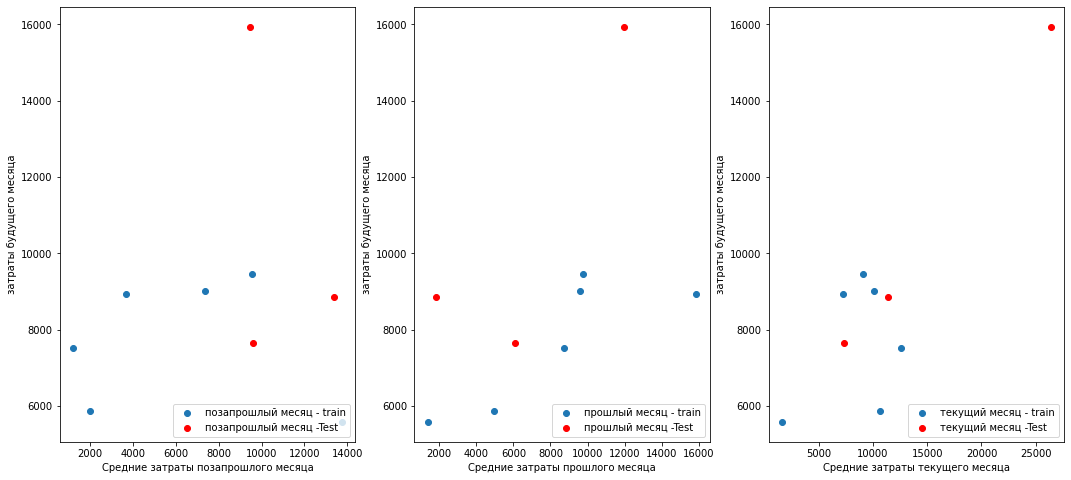

In [ ]:
# Подключаем библиотеку для визуализации данных . Из модуля matplot  импортируем "пайплот" - библиотеку
plt.figure(figsize=(18, 8))
plt.subplot(131)# в скобках 1 цифра - номер строки, 2-номер столбца, 3 - номер графика в строке).
plt.scatter(X_train['1'], y_train, label="позапрошлый месяц - train")# график типа точечная диаграмма  зависимости затрат позапрошлого и будущего месяцев на обучающей выборке -
plt.scatter(X_test['1'], y_test, c="r", label="позапрошлый месяц -Test") #график типа точечная диаграмма  зависимости затрат позапрошлого и будущего месяцевна  проверочной (тестовой)
plt.xlabel("Средние затраты позапрошлого месяца")
plt.ylabel("затраты будущего месяца")
plt.legend(loc="lower right", frameon=True)
plt.subplot(132)#
plt.scatter(X_train['2'], y_train, label="прошлый месяц - train")# график типа точечная диаграмма  зависимости затрат прошлого и будущего месяцев на обучающей выборке -
plt.scatter(X_test['2'], y_test, c="r", label="прошлый месяц -Test") #график типа точечная диаграмма  затрат прошлого и будущего месяцевна  проверочной (тестовой)
plt.xlabel("Средние затраты прошлого месяца")
plt.ylabel("затраты будущего месяца")
plt.legend(loc="lower right", frameon=True)
plt.subplot(133)#
plt.scatter(X_train['3'], y_train, label="текущий месяц - train")# график типа точечная диаграмма  затрат текущего и будущего месяцев на обучающей выборке -
plt.scatter(X_test['3'], y_test, c="r", label="текущий месяц -Test") #график типа точечная диаграмма зависимости затрат текущего и будущего месяцевна  проверочной (тестовой)
plt.xlabel("Средние затраты текущего месяца")
plt.ylabel("затраты будущего месяца")
plt.legend(loc="lower right", frameon=True)


## Создаем и обучаем модель линейной регресии

In [ ]:
# Создайте и обучите модель
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Выведем  к-ты модели
lr.coef_

array([0.33333324, 0.33333388, 0.33333288])

## Получаем предсказание и оцениваем качество

In [ ]:
# Получите предсказание
lr.predict(X_test)

array([ 7660.22063856,  8854.60276962, 15938.24849866])

Оценим "на глаз"

In [ ]:
## Оцениваем на глаз
pd.DataFrame([y_test.values, lr.predict(X_test)]).T

,0,1
0,7660.22,7660.220639
1,8854.61,8854.602770
2,15938.26,15938.248499


In [ ]:
# Оцените качество, при помощи метода mean_squared_error для тестовой выборки
mean_squared_error(y_test, lr.predict(X_test))

6.165568128792911e-05

In [ ]:
mean_squared_error(y_train, lr.predict(X_train))

9.099121057140357e-07

## Делаем предсказание для одной траты в следующем месяце

In [ ]:
# Заполняем данные по конкретной трате
data = [{
    "1": 7371.00,
    "2":9609.34,
    "3": 10089.75

}]

In [ ]:
df_future_expense = pd.DataFrame(data)
df_future_expense.head()

,1,2,3
0,7371.0,9609.34,10089.75


In [ ]:
lr.predict(df_future_expense)

array([9023.36152899])

В google-таблице прогнозная трата для заданных значений признаков указана как 9023,36, т.е. модель получилась очень точная. Но это потому, что колонка "следующий месяц" заполнена как среднее арифметическое по 3 предыдущим колонкам. Если же взять реальные данные за 4 месяца, рассмотрев 4-й как target, то ошибка выходит очень большая. Причина - недостаточно данных в датасете(всего 9 значений по каждому месяцу)